<a href="https://colab.research.google.com/github/Sudhakathir16/sql-asignment/blob/main/Ganesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product


In [2]:
# set the param
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

In [3]:
# define the kernel
kernel = tf.constant([[-1, -1, -1],
                    [-1,  8, -1],
                    [-1, -1, -1],
                   ])

You can upload the image file from your local machine using the following code:

In [6]:
from google.colab import files
files.upload()

Saving Ganesh.jpg to Ganesh (1).jpg


{'Ganesh (1).jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x03\x14\x02\xcc\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x04\x03\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x04\x06\x03\x01\x02\x07\x08\xff\xc4\x00S\x10\x00\x01\x03\x03\x01\x06\x03\x04\x07\x06\x04\x02\x07\x05\x07\x05\x01\x02\x03\x00\x04\x11\x05!\x121A\x13\x06Qa"q\x81\x142\x91#\xa1B\x07R\xb13\xc1b\x15Cr\xd1S$\x82\xe1c\xb2\xa24\x16s\x83\x92\xf0\xb35\x93\xc2\xf1&DE\xd2%d\x08\x17T\xa3\xd3\xe2\xff\xc4\x00\x1b\x01\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x03\x05\x02\x01\x06\x07\xff\xc4\x00.\x11\x00\x02\x02\x02\x02\x02\x03\x00\x01\x0

After uploading the image, you can run the cell again.

In [7]:
# load the image
image = tf.io.read_file('Ganesh.jpg')
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[300, 300])


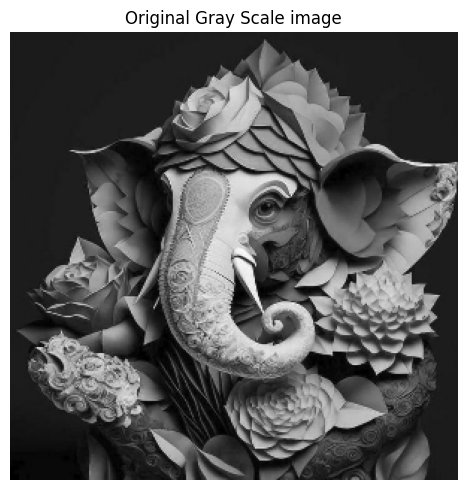

In [8]:
# plot the image
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image')
plt.show();

In [9]:
# Reformat
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

In [10]:
# convolution layer
conv_fn = tf.nn.conv2d

image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1, # or (1, 1)
    padding='SAME',
)

plt.figure(figsize=(15, 5))


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'Convolution')

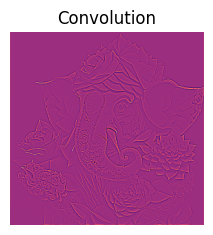

In [11]:
# Plot the convolved image
plt.subplot(1, 3, 1)

plt.imshow(
    tf.squeeze(image_filter)
)
plt.axis('off')
plt.title('Convolution')


In [12]:
# activation layer
relu_fn = tf.nn.relu

Text(0.5, 1.0, 'Activation')

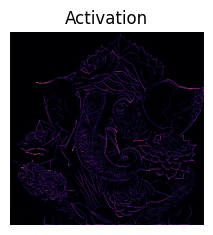

In [13]:
# Image detection
image_detect = relu_fn(image_filter)

plt.subplot(1, 3, 2)
plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_detect)
)

plt.axis('off')
plt.title('Activation')

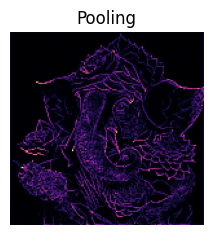

In [14]:
# Pooling layer
pool = tf.nn.pool
image_condense = pool(input=image_detect,
                             window_shape=(2, 2),
                             pooling_type='MAX',
                             strides=(2, 2),
                             padding='SAME',
                            )

plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()